## Final Project Submission

Please fill out:
* Student name: George Mbugua
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba
* Blog post URL:


# Introduction


## Business Problem
Microsoft currently is lack the required insights, facts and figures required to enter the film industry efficiently and effectively.
In order for the CEO Satya Nadella to create and implement strategic goals and objectives required to venture into this industry he will need actionable insights based on existing market data. 
Mention potential income




## Data Understanding
The data sets and databases provide by Microsoft aids us in creating data insights. The datasets are from five popular movie rating and reviews platforms, they are as follows:
	1.IMDB 
	This dataset was used to analyze the popular genres and their correlating vote rating average.
	2. Rotten Tomatoes
	This dataset provide an understanding of the demographics preference
	3.Box Office Mojo
	This is data set used to analyze box office performance and identify successful trends.
	4.TheMovieDB
	This dataset provide insight into which genres provide the highest gross income
	5.The Numbers
 




In [178]:
#Lets import the important libraie
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


In [180]:
bom_movie_df = pd.read_csv("../dsc-phase-1-project-v2-4/bom.movie_gross.csv/bom.movie_gross.csv")

bom_movie_df = pd.DataFrame(bom_movie_df)
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [181]:
#Lets find the shape and information about our dataframe.
print("The Box Offices Dataframe has this shape " , bom_movie_df.shape)


The Box Offices Dataframe has this shape  (3387, 5)


In [182]:
print(bom_movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


# Data Preparation

the proper data cleaning, transforming and organizing is important when creatinng data-driven insights that will be presented later. 

Lets start with cleaning our data and ensure it is ready to be plotted.



In [183]:
#Lets with finding out missing values and sum it up
missing_values = bom_movie_df.isnull().sum()

missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [184]:
#Lets create a function to save some lines of code
def clean_data(bom_movie_df):
    #Let drop the missing values using .dropna()
    bom_movie_df = bom_movie_df.dropna()
    #Lets Strip the white spaces
    bom_movie_df['title'] = bom_movie_df['title'].str.strip()
    bom_movie_df['studio'] = bom_movie_df['studio'].str.strip()
    bom_movie_df['foreign_gross'] = bom_movie_df['foreign_gross'].str.strip()
    #Let make the First letter of each column to be captilized inorder to make our data look more presentable
    bom_movie_df.columns = bom_movie_df.columns.str.title()
    
    return bom_movie_df
#
bom_movie_df = clean_data(bom_movie_df)

C:\Users\George Mbugua\AppData\Local\Temp\ipykernel_10948\4290545615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_df['title'] = bom_movie_df['title'].str.strip()
C:\Users\George Mbugua\AppData\Local\Temp\ipykernel_10948\4290545615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_df['studio'] = bom_movie_df['studio'].str.strip()
C:\Users\George Mbugua\AppData\Local\Temp\ipykernel_10948\4290545615.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [185]:
#Our Column types many need customization. Lets look at the datasets columns data types using .dtype()
bom_movie_df.dtypes
#We cant use "Foreign_Gross" for data analysis if its a object data type. Lets fix this by changing it to a float dtype
bom_movie_df['Foreign_Gross'] = bom_movie_df['Foreign_Gross'].str.replace(',', '').astype('float64')


C:\Users\George Mbugua\AppData\Local\Temp\ipykernel_10948\1719526383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_df['Foreign_Gross'] = bom_movie_df['Foreign_Gross'].str.replace(',', '').astype('float64')


## Feature Engireering

This is a process of transforming or modifying data to improve the data analysis and visulization outcome of the analysis

In [186]:
#Lets combine the domestic gross and foreign gross columns to discover the total gross income per movie
bom_movie_df['Total_Gross'] = bom_movie_df['Domestic_Gross'] + bom_movie_df['Foreign_Gross']

C:\Users\George Mbugua\AppData\Local\Temp\ipykernel_10948\2108210159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_df['Total_Gross'] = bom_movie_df['Domestic_Gross'] + bom_movie_df['Foreign_Gross']


## Data Analysis 

**Data analysis** will describe and model data for intepreation. throught our data analysis we can effectively visulaize our data.

**Data visulaization** will be our graphical presentation of our data. Our graphs will make decision making process run abit smoother.

In [187]:
#Lets first get an overview of our EDA using .describe()
bom_movie_df['Total_Gross'].describe()

count    2.007000e+03
mean     1.228102e+08
std      2.075562e+08
min      4.900000e+03
25%      8.239000e+06
50%      4.240000e+07
75%      1.337500e+08
max      1.518900e+09
Name: Total_Gross, dtype: float64

The Box Office Mojo dataset can provide us with an insight into which competetitors we need to analyze. With our data analysis we can gather the infomation nesscary to choose a competitor to perfom our SWOT analysis on.

In [188]:
total_gross_groupby = bom_movie_df.groupby(['Studio']).agg(Title=('Title', 'first'), Year=('Year', 'first'), Total_Gross=('Total_Gross', 'sum'))
total_gross_groupby.sort_values(["Total_Gross"], ascending=[False])

,Title,Year,Total_Gross
Studio,,,
BV,Toy Story 3,2010,4.419038e+10
Fox,The Chronicles of Narnia: The Voyage of the Da...,2010,3.098037e+10
WB,Harry Potter and the Deathly Hallows Part 1,2010,3.079150e+10
Uni.,Despicable Me,2010,2.974681e+10
Sony,The Karate Kid,2010,2.240472e+10
...,...,...,...
Darin Southa,Reign of Judges: Title of Liberty - Concept Short,2018,9.840000e+04
ICir,Enemies of the People,2010,7.960000e+04
ITL,Love Thy Nature,2015,5.290000e+04


## Data Visualization

**Data visulaization** will be our graphical presentation of our data. Our graphs will make decision making process run abit smoother.

Using Seaborns boxplot and displot graph, we can find what is the genereal performance and trend of the industry.

The Boxplot will give insight into the comparison of the distribution of the total gross income amongst the studios in the dataset.


c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


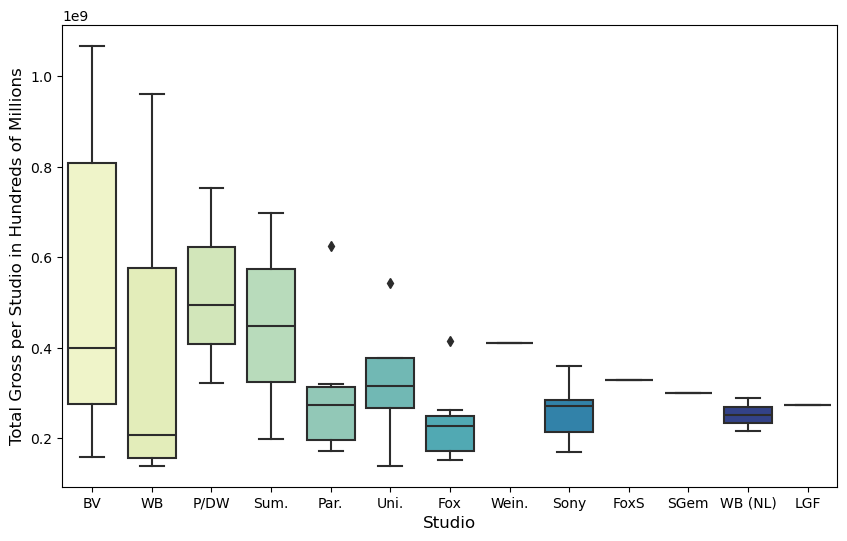

In [189]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Studio', y='Total_Gross', data=bom_movie_df.head(50), palette="YlGnBu")
plt.xlabel('Studio', size=12)
plt.ylabel('Total Gross per Studio in Hundreds of Millions', size=12)
#Dont forget to save the graph to the data folder
plt.savefig('../dsc-phase-1-project-v2-4/data/boxplot_box_office.png', dpi=450)
plt.show()


In [190]:
#Lets Remove the outliers from out data using Pandas only
max_limit = 1000000000 
bom_movie_df = bom_movie_df.drop(bom_movie_df[bom_movie_df['Total_Gross'] > max_limit].index)
bom_movie_df

,Title,Studio,Domestic_Gross,Foreign_Gross,Year,Total_Gross
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000.0
3,Inception,WB,292600000.0,535700000.0,2010,828300000.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000.0
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698500000.0
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,623900000.0
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1501400.0
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,954000.0
3309,Time Freak,Grindstone,10000.0,256000.0,2018,266000.0
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,98400.0


c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


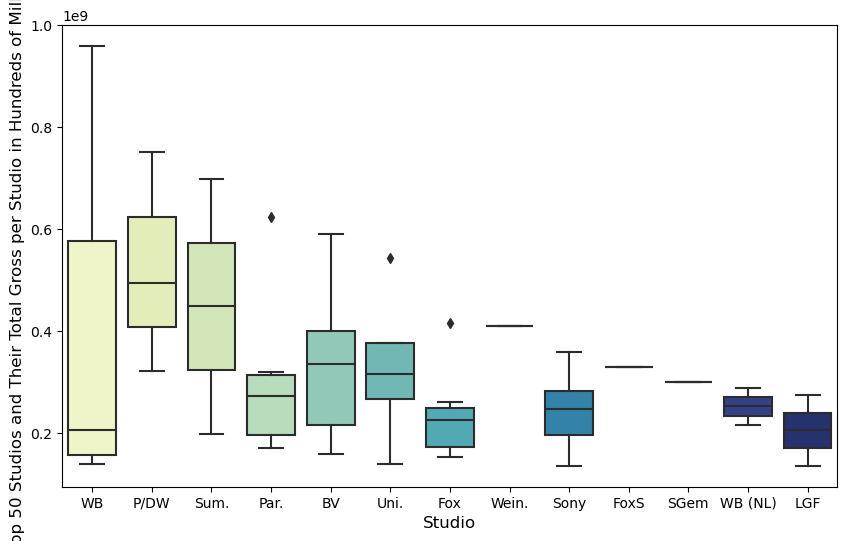

In [191]:
#Lets replot the displot without any outliers present
plt.figure(figsize=(10,6))
sns.boxplot(x='Studio', y='Total_Gross', data=bom_movie_df.head(50), palette="YlGnBu")
plt.xlabel('Studio', size=12)
plt.ylabel('Top 50 Studios and Their Total Gross per Studio in Hundreds of Millions', size=12)
#Dont forget to save the graph to the data folder
plt.savefig('../dsc-phase-1-project-v2-4/data/boxplot_box_office_no_outliers.png', dpi=450)
plt.show()

After removing the outliers that was negatively affecting our graph we can not see a new top performers.

The graph communicates the amongest the top 50 movies released between 2010 to 2018 the Studio Company with the best performance is Warner Bros aka WB.

Warner Bros is the competitor we will perform our SWOT analysis on.

Inorder to understand what the Total Gross column can communicate to us lets us a Distribution Plot graph inorder to understand the distribution of the Total Gross Income

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

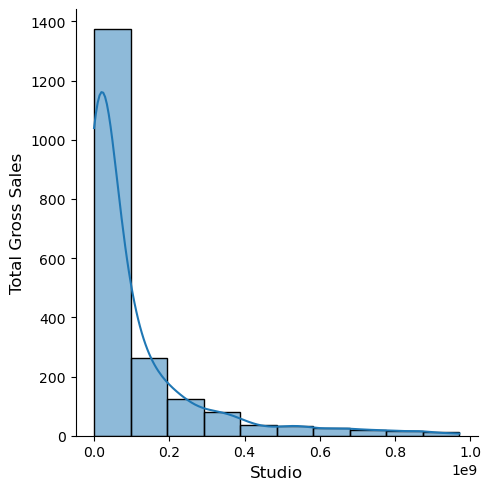

In [192]:
plt.figure(figsize=(10,6))

sns.displot(bom_movie_df['Total_Gross'], kde=True, bins=10)
plt.xlabel('Studio', size=12)
plt.ylabel('Total Gross Sales', size=12)
#Dont forget to save the graph to the data folder
plt.savefig('../dsc-phase-1-project-v2-4/data/distplot_box_office.png', dpi=450)
plt.show()

Lets understand what this graph is communicating:

The Box Office Mojo Total Gross Income data column is skewed to the right. Only a few Studios had movies that grossed over $1 billion. The median Total Gross Income is $3.5 million

Its important for Microsoft to remeber that as the graph show above if a film is not well produced and directed it will not have a Return On Investment.

The right skewed distribution also implies that the movie studio industry may be slowing down and this can be supported by the growing number of people opting for streaming services  due to it vast variety of options.

## IMDb Dataset

This data base from IMDb there are 8 tables that each contain data pataining to the film industry. Below are the tables ranked inorder of importance and relevance to our presentation.
    1.principals
    2.movie_basics
    3.movie_ratings
    4.movie_akas
    5.persons
    6.writers
    7.directors
    8.known_for

 Not all tables will be used.

 Lets import sqlite3
    
    

In [200]:
import sqlite3
conn = sqlite3.connect('../dsc-phase-1-project-v2-4/zippedData/im.db/im.db')


In [201]:
movies_basics_ = """
SELECT *
FROM movie_basics
"""

movie_basics_table = pd.read_sql(movies_basics_, conn)
movie_basics_table = pd.DataFrame(movie_basics_table)

movie_basics_table

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [202]:
#Lets find the shape and information about our dataframe.
print("The shape of the movie_basics table is",movie_basics_table.shape)


The shape of the movie_basics table is (146144, 6)


In [203]:
print("This is a summary of the movie_basics table", movie_basics_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
This is a summary of the movie_basics table None


In [204]:
#Let get the .value_counts() of all the columns
movie_basics_table['genres'].value_counts()


genres
Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: count, Length: 1085, dtype: int64

# Data Preparation

In [205]:
missing_value_movie_basics = movie_basics_table.isnull().sum()
missing_value_movie_basics

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [206]:
def clean_data(movie_basics_table):
    # Drop duplicate rows across all columns
    movie_basics_table = movie_basics_table.dropna(subset=['genres'])
    movie_basics_table = movie_basics_table.dropna(subset=['original_title'])    # Drop rows with missing data across all columns
    #Fill the missing value the mean where apropriate
    movie_basics_table = movie_basics_table.fillna({'runtime_minutes': movie_basics_table['runtime_minutes'].mean()})
    #Let make the First letter of each column to be captilized inorder to make our data look more presentable
    movie_basics_table.columns = movie_basics_table.columns.str.title()
    # Remove leading and trailing whitespace from the columns
    movie_basics_table['Primary_Title'] = movie_basics_table['Primary_Title'].str.strip()
    movie_basics_table['Original_Title'] = movie_basics_table['Original_Title'].str.strip()
    movie_basics_table['Genres'] = movie_basics_table['Genres'].str.strip()
    return movie_basics_table
#
movie_basics_table= clean_data(movie_basics_table)


In [207]:
# Rename column 'Movie_id' to 'movie_id'
movie_basics_table = movie_basics_table.rename(columns={'Movie_Id': 'movie_id'})

In [208]:
movie_basics_table_groupby = round(movie_basics_table.groupby(['Genres']).agg(Movies_In_This_Genre=('Primary_Title', 'count'), Average_Movie_Duration=('Runtime_Minutes', 'mean')))
#Sort by Descending Order to find the top 5 Genres in the database
movie_basics_table_groupby['Movies_In_This_Genre'].sort_values(ascending=False)

Genres
Documentary               32185
Drama                     21486
Comedy                     9177
Horror                     4372
Comedy,Drama               3519
                          ...  
Family,History,Mystery        1
Family,History,Romance        1
Family,Horror                 1
Family,Horror,Romance         1
Adventure,Family,Music        1
Name: Movies_In_This_Genre, Length: 1085, dtype: int64

The movie_basics_table needs to be merged with movie_ratings. We need  to join the Average Rating column and Number of Votes.

In [209]:
#Lets load and join the table
movies_ratings = """
SELECT *
FROM movie_ratings
"""

movies_ratings_table = pd.read_sql(movies_ratings, conn)

movies_ratings_table = pd.DataFrame(movies_ratings_table)

In [210]:
#Lets merge the two tables and the use your data cleaning function.
movie_basics_and_ratings_table = movie_basics_table.merge(movies_ratings_table, on='movie_id')
movie_basics_and_ratings_table

,movie_id,Primary_Title,Original_Title,Start_Year,Runtime_Minutes,Genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.261556,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,86.000000,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000000,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000000,"Drama,Family",8.7,136
73050,tt9914642,Albatross,Albatross,2017,86.261556,Documentary,8.5,8


In [211]:
def clean_data(movie_basics_and_ratings_table):
    # Drop duplicate rows across all columns
    #Rename New Columns
    movie_basics_and_ratings_table = movie_basics_and_ratings_table.rename(columns={'averagerating': 'Average_Rating'})
    movie_basics_and_ratings_table = movie_basics_and_ratings_table.rename(columns={'numvotes': 'Number_of_Votes'})
    #Let make the First letter of each column to be captilized inorder to make our data look more presentable
    movie_basics_and_ratings_table.columns = movie_basics_and_ratings_table.columns.str.title()
    # Remove leading and trailing whitespace from the columns
    movie_basics_and_ratings_table['Primary_Title'] = movie_basics_and_ratings_table['Primary_Title'].str.strip()
    movie_basics_and_ratings_table['Original_Title'] = movie_basics_and_ratings_table['Original_Title'].str.strip()
    movie_basics_and_ratings_table['Genres'] = movie_basics_and_ratings_table['Genres'].str.strip()
    # Rename column 'Movie_id' to 'movie_id incase we need to merge'
    movie_basics_and_ratings_table = movie_basics_and_ratings_table.rename(columns={'Movie_Id': 'movie_id'})
    return movie_basics_and_ratings_table
#
movie_basics_and_ratings_table = clean_data(movie_basics_and_ratings_table)


In [212]:
#Find the descriptive analysis
genre_uni0 = 'Genres'
rating = 'Average_Rating'
genre_uni = movie_basics_and_ratings_table[genre_uni0]
rating_hue = movie_basics_and_ratings_table[rating]
unique_values = np.unique(genre_uni)
value_count = genre_uni.value_counts()

print(f"Mean: {np.mean(value_count)}")
print(f"Median: {np.median(value_count)}")
print(f"Standard Deviation: {np.std(value_count)}")
print(f"Minimum: {np.min(value_count)}")
print(f"Maxiumn: {np.max(value_count)}")



Mean: 79.1462621885157
Median: 5.0
Standard Deviation: 569.1026210991557
Minimum: 1
Maxiumn: 11612


c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


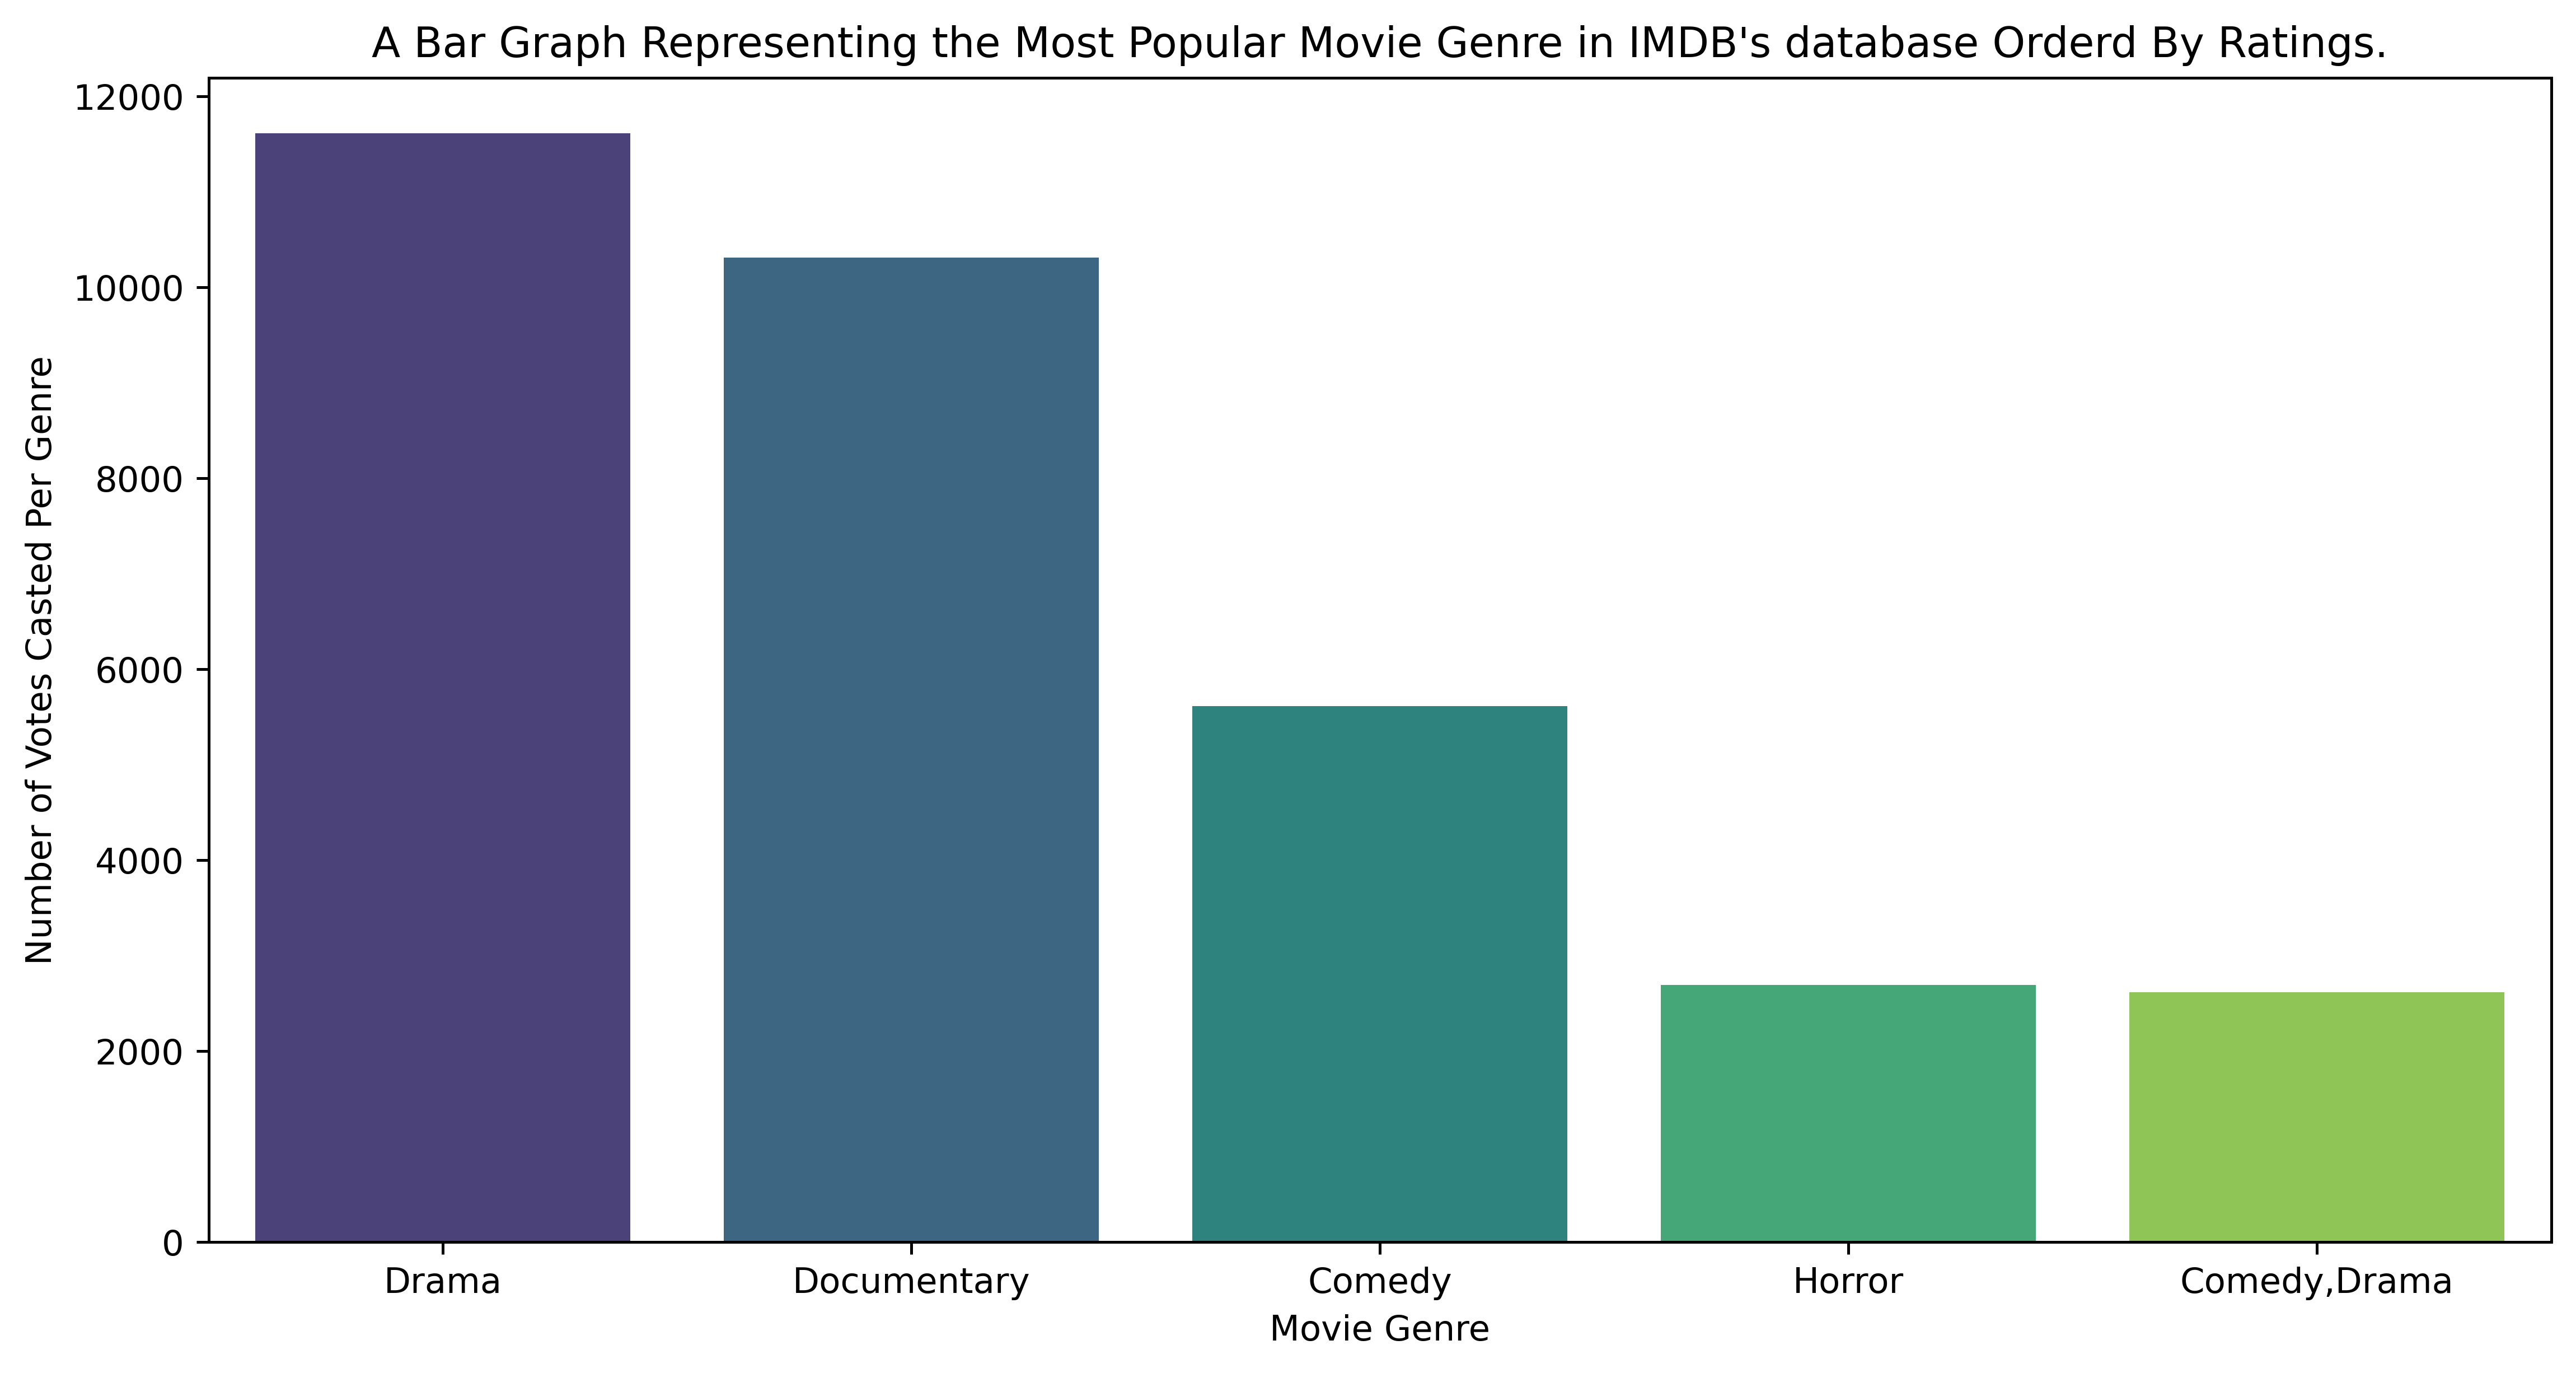

In [213]:
data_for_graph = {'Genre':['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy,Drama'],'Count':[11612, 10313, 5613, 2692, 2617]}
df = pd.DataFrame(data_for_graph)

fig, ax = plt.subplots(figsize=(12, 6), dpi=450)
sns.barplot(x="Genre", y="Count",hue_order='Rating', palette='viridis', data=df)
plt.title("A Bar Graph Representing the Most Popular Movie Genre in IMDB's database Orderd By Ratings.")
plt.xlabel("Movie Genre")
plt.ylabel("Number of Votes Casted Per Genre")
plt.savefig('../dsc-phase-1-project-v2-4/data/bargraph_box_office.png', dpi=450)
plt.show()


In [ ]:
grouped_data= movie_basics_and_ratings_table.groupby('Genres').head()

fig, ax = plt.subplots()

grouped_data['Average_Rating'].mean().displot(kind='bar', ax=ax)

plt.title("Average Votes per Movie by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Votes per Movie")
plt.savefig('../dsc-phase-1-project-v2-4/data/plot_movie_basics.png', dpi=450)
plt.show()

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\George Mbugua\AppData\Local\Temp\ipykernel_10948\532805302.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Average_Rating', y='Number_Of_Votes', data=movie_basics_and_ratings_table, palette='deep')


<Axes: xlabel='Average_Rating', ylabel='Number_Of_Votes'>

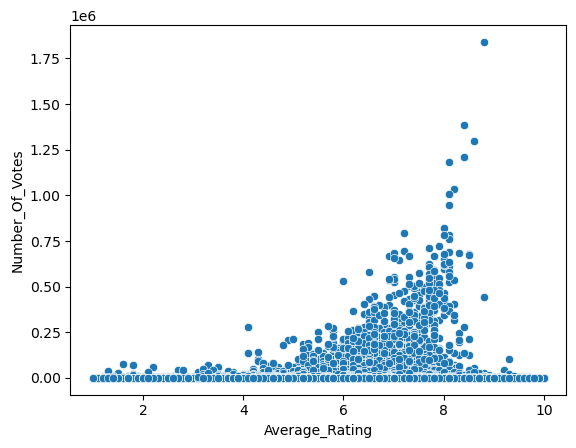

In [221]:
sns.scatterplot(x='Average_Rating', y='Number_Of_Votes', data=movie_basics_and_ratings_table, palette='deep')

The provided graph illustrates a positive correlation between average rating and the number of votes. This suggests that higher-rated items tend to attract more votes. One possible explanation is that people are inclined to vote for high-quality items, such as products with high average ratings when making online purchases.

## Inconcluesion